<a href="https://colab.research.google.com/github/jnsbrdbr/thesis/blob/thesis/TTUNbalance_Gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-rc0

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.8.0


In [2]:
import keras
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [4]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip3 install pickle5
import pickle5 as pickle

In [6]:
with open('/content/drive/MyDrive/10000/unsmote/TUnsmote_Tresult.pkl', "rb") as fh:
  result = pickle.load(fh)

In [7]:
#final data
print(result)

             0         1         2  ...         8         9  label
0    -0.018442 -4.220618 -0.916300  ... -0.010241 -0.181514      1
1    -0.018442 -4.220618 -0.916300  ... -0.010241 -0.181514      1
2    -0.018442 -4.220618 -0.916300  ... -0.010241 -0.181514      1
3    -0.018442 -4.220618 -0.916300  ... -0.010241 -0.181514      1
4    -0.018444 -4.221080 -0.916678  ...  0.057121  0.838856      1
...        ...       ...       ...  ...       ...       ...    ...
9995 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1
9996 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1
9997 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1
9998 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1
9999 -0.264492 -4.771727 -2.334318  ...  0.017370  0.231334      1

[10000 rows x 101 columns]


In [8]:
#divide data in to data_label and non_data label

import copy
result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel
y=result.label

In [9]:
#splitting data in to test and train...

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=42,test_size=0.3)#

In [10]:
print('shape of x_train is:',X_train.shape)
print('shape of x_test is:',X_test.shape)

shape of x_train is: (7000, 100)
shape of x_test is: (3000, 100)


In [11]:
def make_latent_samples(n_samples, sample_size):
    #return np.random.uniform(-1, 1, size=(n_samples, sample_size))
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

In [12]:
make_latent_samples(1, 300) # generates one sample

array([[ 4.75970660e-01,  1.42001991e+00,  4.92749501e-01,
        -1.71791108e+00, -1.71523157e+00,  2.46799703e-01,
         2.92852178e-01,  3.67791787e-01,  3.66342634e-01,
        -4.87940341e-02, -1.32199700e-01,  2.18170634e+00,
         2.94970128e-01,  1.26549574e-01,  8.93586630e-01,
         1.36745841e+00,  5.71893746e-01,  3.07955407e-01,
         4.04076251e-01,  3.70206590e-01,  6.78651223e-01,
         8.54143587e-01, -5.60723668e-01, -1.09783494e+00,
         1.44160616e+00,  9.61658582e-01,  1.14112932e+00,
         5.88945590e-01,  2.10131587e-01,  4.42752802e-01,
        -4.87143923e-01,  2.87237618e-02,  9.62610548e-01,
         4.06322313e+00, -1.26687241e+00, -9.67046481e-01,
         3.53464576e-01, -1.83112434e-01, -1.19010730e+00,
         7.72130414e-01,  4.24767618e-01, -3.12888006e-01,
        -4.26788952e-02, -3.23895295e-01,  4.28717257e-01,
         5.94358255e-01, -1.00047428e+00, -1.72141704e+00,
         7.07602000e-01, -1.83359220e+00, -2.54069271e+0

In [13]:
generator = Sequential([
    Dense(256, input_shape=(300,)),
    LeakyReLU(alpha=0.02),
    #BatchNormalization(momentum=0.6),
    #Dense(512),
    #LeakyReLU(alpha=0.02),
    #BatchNormalization(momentum=0.6),
    #Dense(256),
    #LeakyReLU(alpha=0.02),
    #BatchNormalization(momentum=0.6),
    #Dense(128),
    #LeakyReLU(alpha=0.02),
    #BatchNormalization(momentum=0.6),
    Dense(100),
    Activation('tanh')
], name='generator')

generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               77056     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               25700     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
Total params: 102,756
Trainable params: 102,756
Non-trainable params: 0
_________________________________________________________________


In [14]:
discriminator = Sequential([
    Dense(128, input_shape=(100,)),
    LeakyReLU(alpha=0.02),
    #(momentum=0.6),
    Dense(64),
    LeakyReLU(alpha=0.02),
    #BatchNormalization(momentum=0.6),
    Dense(32),
    LeakyReLU(alpha=0.02),
    #BatchNormalization(momentum=0.6),
    #Dense(16),
    #LeakyReLU(alpha=0.02),
    #BatchNormalization(momentum=0.6),
    #Dense(8),
    #LeakyReLU(alpha=0.02),
    #BatchNormalization(momentum=0.6),
    Dense(1),
    Activation('sigmoid')
], name='discriminator')

discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               12928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)               

In [15]:
# maintain the same shared weights with the generator and the discriminator.
gan = Sequential([
    generator,
    discriminator
])

gan.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 generator (Sequential)      (None, 100)               102756    
                                                                 
 discriminator (Sequential)  (None, 1)                 23297     
                                                                 
Total params: 126,053
Trainable params: 126,053
Non-trainable params: 0
_________________________________________________________________


In [16]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

In [17]:
make_trainable(discriminator, False)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               12928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)               

In [18]:
make_trainable(discriminator, True)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               12928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)               

In [19]:
def make_simple_GAN(sample_size, 
                    g_hidden_size_1,
                    g_hidden_size_2,
                    g_hidden_size_3,
                    g_hidden_size_4,
                    d_hidden_size_1,
                    d_hidden_size_2, 
                    d_hidden_size_3,
                    d_hidden_size_4,
                    d_hidden_size_5,
                    leaky_alpha, 
                    g_learning_rate,
                    d_learning_rate):
    K.clear_session()
    
    generator = Sequential([
        Dense(g_hidden_size_1, input_shape=(sample_size,)),
        LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.6),
        #Dense(g_hidden_size_2),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.6),
        #Dense(g_hidden_size_3),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.6),
        #Dense(g_hidden_size_4),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.6),
        Dense(100),        
        Activation('tanh')
    ], name='generator')    

    discriminator = Sequential([
        Dense(d_hidden_size_1, input_shape=(100,)),
        LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.6),
        Dense(d_hidden_size_2),
        LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.6),
        Dense(d_hidden_size_3),
        LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.6),
        #Dense(d_hidden_size_4),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.6),
        #Dense(d_hidden_size_5),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.6),
        Dense(1),
        Activation('sigmoid')
    ], name='discriminator')    
    
    gan = Sequential([
        generator,
        discriminator
    ])
    
    discriminator.compile(optimizer=Adam(lr=d_learning_rate), loss='binary_crossentropy')
    gan.compile(optimizer=Adam(lr=g_learning_rate), loss='binary_crossentropy')
    
    return gan, generator, discriminator 

In [20]:
from sklearn import preprocessing
def preprocess(x):
   x = preprocessing.scale(x)
   return x

In [21]:
X_train_real = np.array(preprocess(X_train))
X_test_real  = np.array(preprocess(X_test))

In [22]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

In [23]:
y_real_10, y_fake_10 = make_labels(10)

y_real_10, y_fake_10

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]), array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [24]:
# hyperparameters
sample_size     = 300     # latent sample size (i.e., 100 random numbers)
g_hidden_size_1 = 256
g_hidden_size_2 = 0
g_hidden_size_3 = 0
g_hidden_size_4 = 0
d_hidden_size_1 = 128
d_hidden_size_2 = 64
d_hidden_size_3 = 32
d_hidden_size_4 = 16
d_hidden_size_5 = 8
leaky_alpha     = 0.02
g_learning_rate = 0.0001  # learning rate for the generator
d_learning_rate = 0.001   # learning rate for the discriminator
epochs          = 150
batch_size      = 64      # train batch size
eval_size       = 16      # evaluate size
smooth          = 0.1


In [25]:
## labels for the batch size and the test size
y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

# create a GAN, a generator and a discriminator
gan, generator, discriminator = make_simple_GAN(
    sample_size, 
    g_hidden_size_1, 
    g_hidden_size_2,
    g_hidden_size_3,
    g_hidden_size_4, 
    d_hidden_size_1, 
    d_hidden_size_2,
    d_hidden_size_3,
    d_hidden_size_4,
    d_hidden_size_5,
    leaky_alpha, 
    g_learning_rate,
    d_learning_rate)


losses = []
losses1 = []
for e in range(epochs):
    for i in range(len(X_train_real)//batch_size):
        # real MNIST digit images
        X_batch_real = X_train_real[i*batch_size:(i+1)*batch_size]
        
        # latent samples and the generated digit images
        latent_samples = make_latent_samples(batch_size, sample_size)
        X_batch_fake = generator.predict_on_batch(latent_samples)
        
        # train the discriminator to detect real and fake images
        make_trainable(discriminator, True)
        discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(X_batch_fake, y_train_fake)

        # train the generator via GAN
        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)
   # evaluate
    X_eval_real = X_test_real[np.random.choice(len(X_test_real), eval_size, replace=False)]
    
    latent_samples = make_latent_samples(eval_size, sample_size)
    X_eval_fake = generator.predict_on_batch(latent_samples)

    d_loss  = discriminator.test_on_batch(X_eval_real, y_eval_real)
    d_loss += discriminator.test_on_batch(X_eval_fake, y_eval_fake)
    g_loss  = gan.test_on_batch(latent_samples, y_eval_real) # we want the fake to be realistic!
    
    losses.append((d_loss, g_loss))

    #d_acc_real = discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
    #d_acc_fake = discriminator.train_on_batch(X_batch_fake, y_train_fake)
    #d_acc  = 0.5 * (d_acc_real + d_acc_fake)

    #losses1.append(( d_acc))
    print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f} ".format(
        e+1, epochs, d_loss, g_loss)) #Discriminator acc: {:>6.4f}:,d_acc

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch:   1/150 Discriminator Loss: 0.1905 Generator Loss: 4.2123 
Epoch:   2/150 Discriminator Loss: 0.1204 Generator Loss: 4.6946 
Epoch:   3/150 Discriminator Loss: 0.0874 Generator Loss: 5.9507 
Epoch:   4/150 Discriminator Loss: 0.1317 Generator Loss: 5.7591 
Epoch:   5/150 Discriminator Loss: 0.0991 Generator Loss: 5.7525 
Epoch:   6/150 Discriminator Loss: 0.0908 Generator Loss: 7.0454 
Epoch:   7/150 Discriminator Loss: 0.0973 Generator Loss: 7.0628 
Epoch:   8/150 Discriminator Loss: 0.0899 Generator Loss: 7.1929 
Epoch:   9/150 Discriminator Loss: 0.0921 Generator Loss: 7.3737 
Epoch:  10/150 Discriminator Loss: 0.1009 Generator Loss: 7.2833 
Epoch:  11/150 Discriminator Loss: 0.3940 Generator Loss: 7.1672 
Epoch:  12/150 Discriminator Loss: 0.0921 Generator Loss: 7.7643 
Epoch:  13/150 Discriminator Loss: 0.0853 Generator Loss: 7.7472 
Epoch:  14/150 Discriminator Loss: 0.0751 Generator Loss: 7.5574 
Epoch:  15/150 Discriminator Loss: 0.0804 Generator Loss: 8.0873 
Epoch:  16

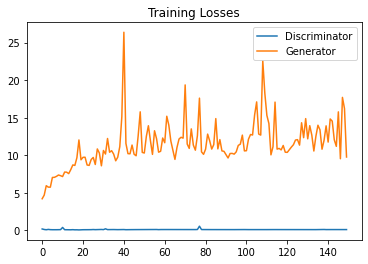

In [26]:
losses = np.array(losses)

fig, ax = plt.subplots()
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

In [27]:
rr = discriminator.predict_on_batch(X_test_real)

In [28]:
import keras
#import keras_metrics

r = tf.keras.metrics.Recall()#thresholds=rr.min())
r.update_state(y_test,rr )
r.result().numpy()


1.0

In [29]:
p=tf.keras.metrics.Precision()#thresholds=rr.min())
p.update_state(y_test,rr )
p.result().numpy()

0.9913333